In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

file = "/content/gdrive/My Drive/1Stock_Price_Train.csv"
file2="/content/gdrive/My Drive/1Stock_Price_Test.csv"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(file, index_col = 0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 3/1/2012 to 12/30/2016
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   object 
 4   Volume     1258 non-null   object 
 5   Sentiment  1258 non-null   float64
dtypes: float64(4), object(2)
memory usage: 68.8+ KB


,Open,High,Low,Close,Volume,Sentiment
Date,,,,,,
3/1/2012,325.25,332.83,324.97,663.59,"7,380,500",0.054269
4/1/2012,331.27,333.87,329.08,666.45,"5,749,400",0.443195
5/1/2012,329.83,330.75,326.89,657.21,"6,590,300",0.584766
6/1/2012,328.34,328.77,323.68,648.24,"5,405,900",0.038976
9/1/2012,322.04,322.29,309.46,620.76,"11,688,800",0.417726


In [ ]:
dataset_train = pd.read_csv(file)
training_set = dataset_train.iloc[:, [1, 6]].values
print(training_set)

#using iloc we have selected open and sentiment columns

[[3.25250000e+02 5.42691740e-02]
 [3.31270000e+02 4.43194765e-01]
 [3.29830000e+02 5.84765624e-01]
 ...
 [7.93700000e+02 1.37792120e-01]
 [7.83330000e+02 7.24438500e-02]
 [7.82750000e+02 1.95534118e-01]]


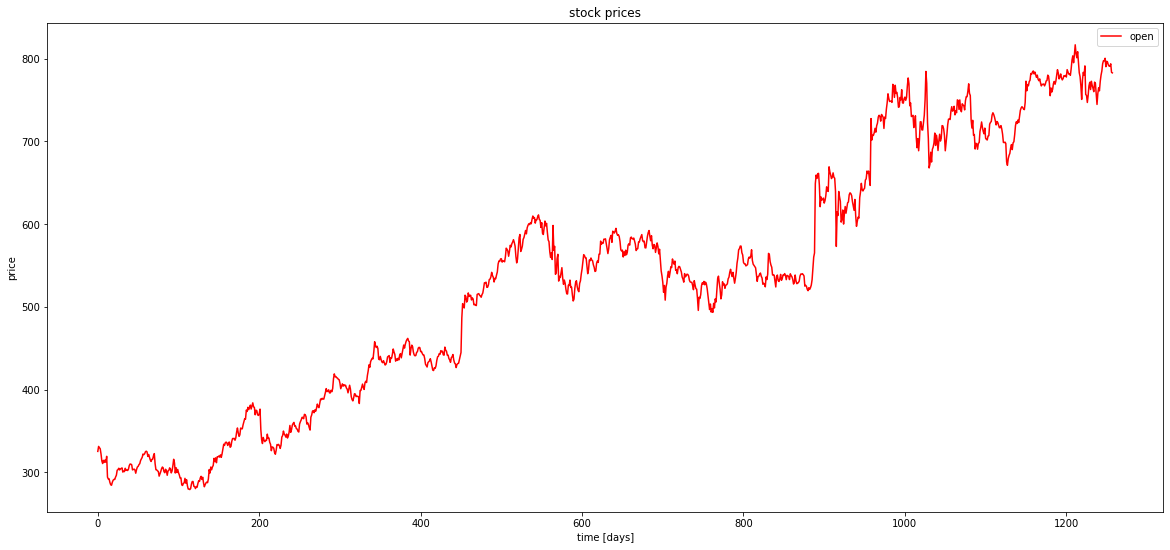

In [ ]:
plt.figure(figsize=(20, 9));
plt.plot(df.Open.values, color='red', label='open')
#plt.plot(df.Low.values, color='blue', label='low')
#plt.plot(df.High.values, color='black', label='high')
plt.title('stock prices')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368 0.05382832]
 [0.09701243 0.44333793]
 [0.09433366 0.58512138]
 ...
 [0.95725128 0.13747668]
 [0.93796041 0.07203028]
 [0.93688146 0.19530539]]


In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
X_train.append([])
X_train.append([])
# we have created a 2D array
y_train = []

for i in range(60, 1258):
    X_train[0].append(training_set_scaled[i-60:i, 0])
    X_train[1].append(training_set_scaled[i-60:i, 1])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
print(X_train)

[[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
  [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
  [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
  ...
  [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
  [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
  [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]

 [[0.05382832 0.44333793 0.58512138 ... 0.96264534 0.49693967 0.85223773]
  [0.44333793 0.58512138 0.03851247 ... 0.49693967 0.85223773 0.76171189]
  [0.58512138 0.03851247 0.41783076 ... 0.85223773 0.76171189 0.9389929 ]
  ...
  [0.66960336 0.96863193 0.77670793 ... 0.94660975 0.49209581 0.17898431]
  [0.96863193 0.77670793 0.60585258 ... 0.49209581 0.17898431 0.13747668]
  [0.77670793 0.60585258 0.93385643 ... 0.17898431 0.13747668 0.07203028]]]


In [ ]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


#real code

In [ ]:
X_train.shape[0]

2

In [ ]:
X_train.shape[1]

1198

In [ ]:
X_train.shape[2]

60

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[2], 2))

In [ ]:
X_train.shape

(1198, 60, 2)

In [ ]:
# Building the RNN
!pip install tensorflow==1.14
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the LSTM and Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 2)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a third LSTM layer and  Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

dataset_test = pd.read_csv(file2)
real_stock_price = dataset_test.iloc[:, [1]].values

Epoch 1/30
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0802
Epoch 2/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0548
Epoch 3/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0524
Epoch 4/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0494
Epoch 5/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0486
Epoch 6/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0455
Epoch 7/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0429
Epoch 8/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0445
Epoch 9/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0441
Epoch 10/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0427
Epoch 11/30
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0413
Epoch 12/30
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0421
E

In [ ]:
# preprocessing the data to do prediction real 
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)

In [ ]:
sdataset_total = pd.concat((dataset_train['Sentiment'], dataset_test['Sentiment']), axis = 0)
sinputs = sdataset_total[len(sdataset_total) - len(dataset_test) - 60:].values
sinputs = sinputs.reshape(-1,1)
inputs = sc.fit_transform(sinputs)

In [ ]:
X_test = []
X_test.append([])
X_test.append([])
for i in range(60, 80):
    X_test[0].append(inputs[i-60:i, 0])
    X_test[1].append(sinputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[2], 2))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

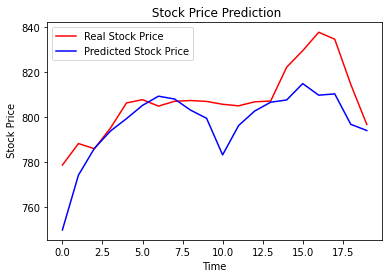

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
def get_mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = get_mape(real_stock_price, predicted_stock_price)
print(mape)

1.286322788713921
